In [5]:
import time
import datetime
import random
from uniswappy import *
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# -------------------
# Canonical Settings
# -------------------
usdc_tkn_nm = "USDC"
usdc_sell_token = '0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48'
time_window = 3
trade_bias = 0.5
max_trade_percent = 0.03

# -------------------
# WETH Settings
# -------------------
weth_tkn_nm = "WETH"
weth_buy_token = '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'
weth_init_amt = 1000
weth_td_model = TokenDeltaModel(max_trade = max_trade_percent*weth_init_amt, 
                                shape=1, # Gamma Dist. shape  
                                scale=1) # Gamma Dist. scale 

# -------------------
# LINK Settings
# -------------------
link_tkn_nm = "LINK"
link_buy_token = '0x514910771AF9Ca656af840dff83E8264EcF986CA' 
link_init_amt = 100000
link_td_model = TokenDeltaModel(max_trade = max_trade_percent*link_init_amt, 
                                shape=1, # Gamma Dist. shape 
                                scale=1) # Gamma Dist. scale

# -------------------
# UNI Settings
# -------------------
uni_tkn_nm = "UNI"
uni_buy_token = '0x1f9840a85d5aF5bf1D1762F925BDADdC4201F984'
uni_init_amt = 100000
uni_td_model = TokenDeltaModel(max_trade = max_trade_percent*uni_init_amt, 
                               shape=1, # Gamma Dist. shape 
                               scale=1) # Gamma Dist. scale

# -------------------
# WBTC Settings
# -------------------
wbtc_tkn_nm = "WBTC"
wbtc_buy_token = '0x2260FAC5E5542a773Aa44fBCfeDf7C193bc2C599'
wbtc_init_amt = 100
wbtc_td_model = TokenDeltaModel(max_trade = max_trade_percent*wbtc_init_amt, 
                               shape=1, # Gamma Dist. shape 
                               scale=1) # Gamma Dist. scale

# -------------------
# BNB Settings
# -------------------
bnb_tkn_nm = "BNB"
bnb_buy_token = '0xB8c77482e45F1F44dE1745F52C74426C631bDD52'
bnb_init_amt = 10000
bnb_td_model = TokenDeltaModel(max_trade = max_trade_percent*bnb_init_amt, 
                               shape=1, # Gamma Dist. shape 
                               scale=1) # Gamma Dist. scale


# -------------------
# ETHDenverSim
# -------------------
sim = ETHDenverSimulator(buy_token = bnb_buy_token,
                         sell_token = usdc_sell_token,
                         time_window = 3,
                         trade_bias = trade_bias,
                         td_model = bnb_td_model)

sim.init_lp(init_x_tkn = bnb_init_amt, x_tkn_nm = bnb_tkn_nm)

# --------------------
# INFINITE PROCESS
# --------------------
# sim.process()  

# --------------------
# RETRIEVE STATE DATA
# --------------------
# swap_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP)
# swap_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP)

# arb_x_reserve = sim.get_x_reserve(ETHDenverSimulator.STATE_ARB)
# arb_y_reserve = sim.get_y_reserve(ETHDenverSimulator.STATE_ARB)

# swap_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_SWAP)
# arb_lp_price = sim.get_lp_price(ETHDenverSimulator.STATE_ARB)

# swap_amt = sim.get_swap_amt()

In [3]:
x_amt_arr = []
y_amt_arr = []
lp_price_arr = []
tstamp_arr = []
swap_amt_arr = []
swap_tstamp_arr = []

N = 5
for k in range(N):
    sim.trial()
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_SWAP))
    tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))    
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_SWAP))
    x_amt_arr.append(sim.get_x_reserve(ETHDenverSimulator.STATE_ARB))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_SWAP))
    y_amt_arr.append(sim.get_y_reserve(ETHDenverSimulator.STATE_ARB))   
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_SWAP))
    lp_price_arr.append(sim.get_lp_price(ETHDenverSimulator.STATE_ARB))
    swap_tstamp_arr.append(sim.get_time_stamp(ETHDenverSimulator.STATE_ARB))
    swap_amt_arr.append(sim.get_swap_amt())
    print(f"Trial {k}")   

Trial 0
Trial 1
Trial 2
Trial 3
Trial 4


Text(0, 0.5, 'BNB Swap Amounts')

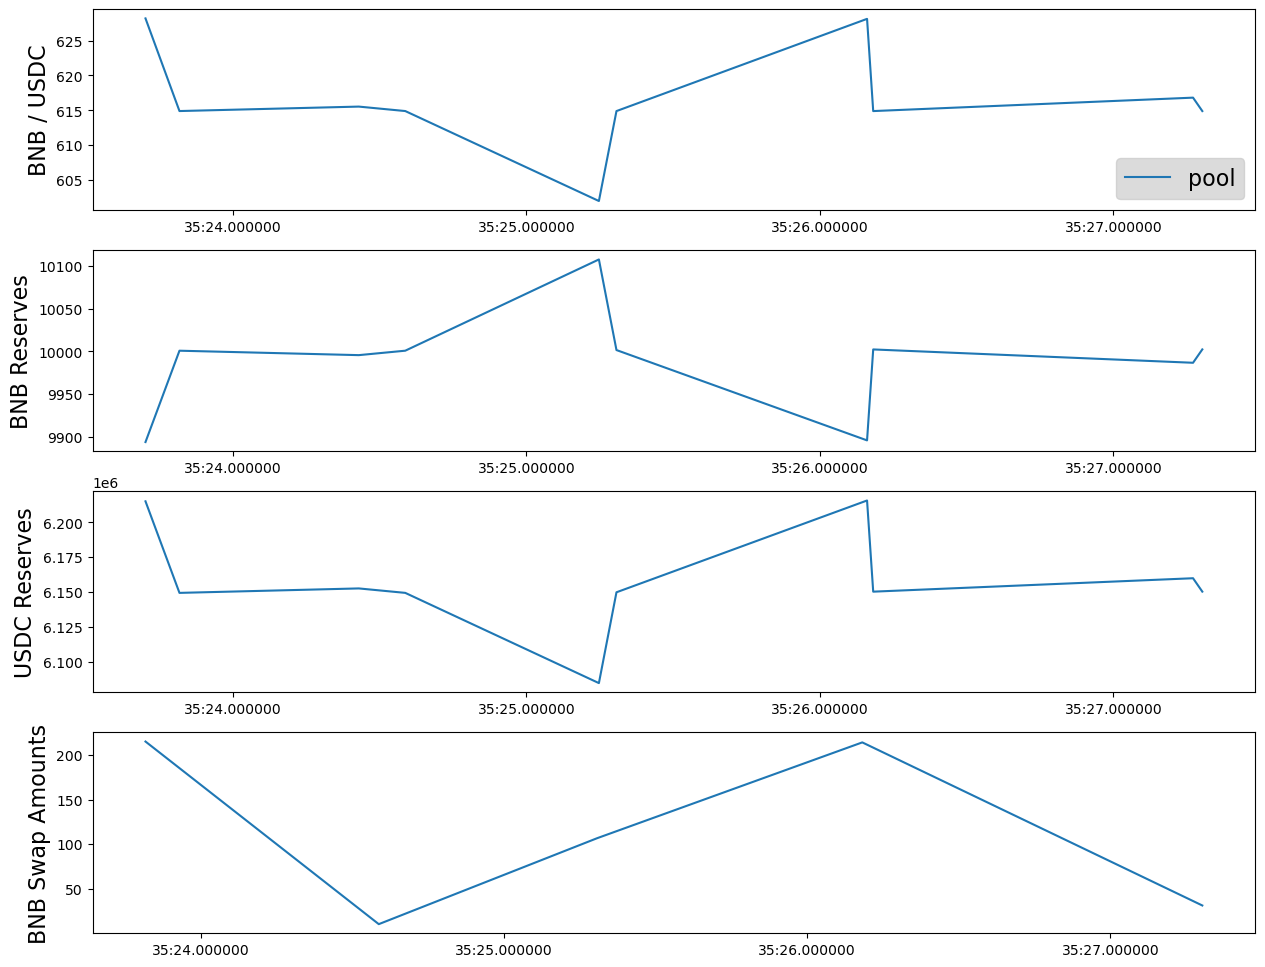

In [4]:
fig, (p_ax, tkn1_ax, tkn2_ax, s_ax) = plt.subplots(nrows=4, sharex=False, sharey=False, figsize=(15, 12))
p_ax.plot(tstamp_arr, lp_price_arr, label='pool')
p_ax.set_ylabel(f'{sim.get_x_tkn().token_name} / {sim.get_y_tkn().token_name}', fontsize=16)
p_ax.legend(fontsize=16, facecolor="lightgray", loc='lower right')

tkn1_ax.plot(tstamp_arr, x_amt_arr)
tkn1_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Reserves', fontsize=16)

tkn2_ax.plot(tstamp_arr, y_amt_arr)
tkn2_ax.set_ylabel(f'{sim.get_y_tkn().token_name} Reserves', fontsize=16)

s_ax.plot(swap_tstamp_arr, swap_amt_arr)
s_ax.set_ylabel(f'{sim.get_x_tkn().token_name} Swap Amounts', fontsize=16)